In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow
!pip install keras

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=c61ca6e7d761baa06453aa9af3e123726e8e3bc288cffc29d9c6df8b5d8eb469
  Stored in directory: c:\users\sanchayan\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2010-01-01'
end = '2019-12-31'
df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.938202
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.325790
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.298744
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.721909
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.245941


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [6]:
#Removing the unwanted columns 

In [7]:
df = df.drop(['Date','Adj Close'],axis =1)              
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


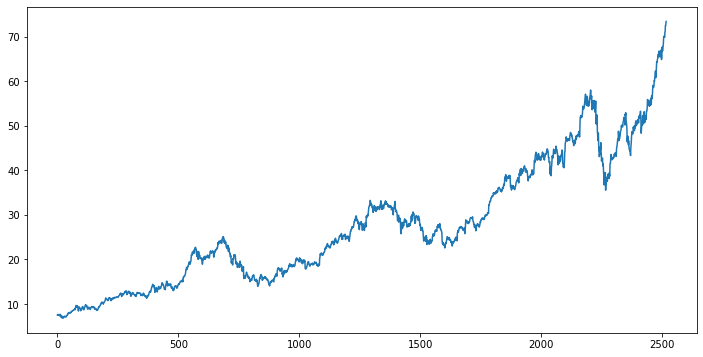

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)

In [9]:
#Finding the moving average of 100 days

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

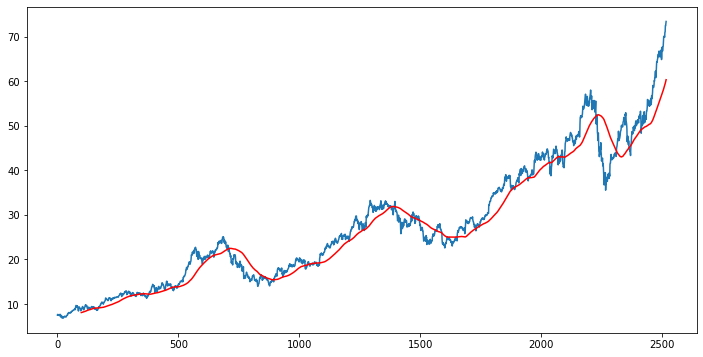

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

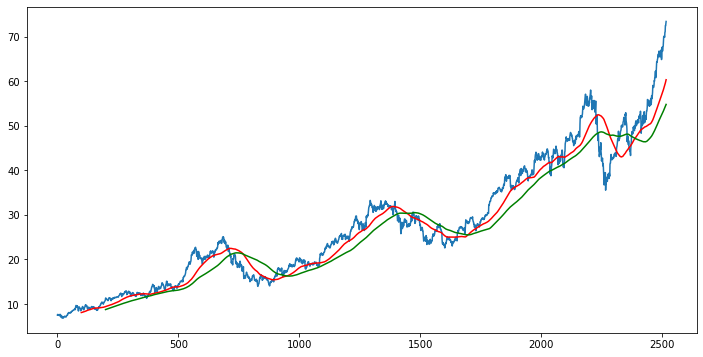

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [14]:
#Splitting data into training and testing

In [15]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])
print(data_training.head())
print(data_testing.head())

      Close
0  7.526071
1  7.643214
2  7.656429
3  7.534643
4  7.520714
          Close
1761  29.182501
1762  28.955000
1763  29.037500
1764  29.004999
1765  29.152500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))


In [17]:
data_training_arr=scaler.fit_transform(data_training)
data_training_arr

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [18]:
X_train = []
Y_train = []

In [19]:
data_training_arr.shape

(1761, 1)

In [23]:
for i in range(100, data_training_arr.shape[0]):
    X_train.append(data_training_arr[i-100: i])
    Y_train.append(data_training_arr[i,0])
X_train , Y_train = np.array(X_train), np.array(Y_train)

In [24]:
X_train

array([[[0.02527908],
        [0.02971782],
        [0.03021854],
        ...,
        [0.06802896],
        [0.07403745],
        [0.07195343]],

       [[0.02971782],
        [0.03021854],
        [0.02560389],
        ...,
        [0.07403745],
        [0.07195343],
        [0.07045129]],

       [[0.03021854],
        [0.02560389],
        [0.02507608],
        ...,
        [0.07195343],
        [0.07045129],
        [0.08295551]],

       ...,

       [[0.74224237],
        [0.74300022],
        [0.7582516 ],
        ...,
        [0.84795991],
        [0.84900194],
        [0.84170783]],

       [[0.74300022],
        [0.7582516 ],
        [0.76668248],
        ...,
        [0.84900194],
        [0.84170783],
        [0.84388656]],

       [[0.7582516 ],
        [0.76668248],
        [0.7708505 ],
        ...,
        [0.84170783],
        [0.84388656],
        [0.85089656]]])

In [25]:
# ML Modeling 

In [26]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu', return_sequences = True,input_shape= (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

#Adding all the above 4 layers
model.add(Dense(units = 1))


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 15s 205ms/step - loss: 0.0645
Epoch 2/50
52/52 [==============================] - 10s 201ms/step - loss: 0.0140
Epoch 3/50
52/52 [==============================] - 10s 183ms/step - loss: 0.0110
Epoch 4/50
52/52 [==============================] - 10s 184ms/step - loss: 0.0097
Epoch 5/50
52/52 [==============================] - 10s 192ms/step - loss: 0.0086
Epoch 6/50
52/52 [==============================] - 10s 190ms/step - loss: 0.0083
Epoch 7/50
52/52 [==============================] - 10s 191ms/step - loss: 0.0081
Epoch 8/50
52/52 [==============================] - 10s 188ms/step - loss: 0.0076
Epoch 9/50
52/52 [==============================] - 10s 189ms/step - loss: 0.0091
Epoch 10/50
52/52 [==============================] - 10s 190ms/step - loss: 0.0081
Epoch 11/50
52/52 [==============================] - 10s 186ms/step - loss: 0.0074
Epoch 12/50
52/52 [==============================] - 10s 193ms/step - loss: 0.0073
Epoch 13/50
5

In [49]:
model.save("deep_learning_model.h5")

In [50]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [51]:
data_training.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [52]:
past_100_days = data_training.tail(100)

In [53]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [54]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [55]:
#Scaling down the data

In [56]:
input_data = scaler.fit_transform(final_df)

In [57]:
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [58]:
input_data.shape

(856, 1)

In [59]:
X_test= []
Y_test= []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    Y_test.append(input_data[i, 0])

In [60]:
X_test, Y_test= np.array(X_test), np.array(Y_test)
print(X_test.shape)
print(Y_test.shape)

(756, 100, 1)
(756,)


In [61]:
#Prediction

In [62]:
y_predict= model.predict(X_test)
y_predict.shape

(756, 1)

In [63]:
Y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [64]:
y_predict

array([[0.14477864],
       [0.14550886],
       [0.14614567],
       [0.14666498],
       [0.14706047],
       [0.14733636],
       [0.14751947],
       [0.14765795],
       [0.1478009 ],
       [0.14798418],
       [0.14823124],
       [0.14854014],
       [0.14890498],
       [0.14931865],
       [0.14977215],
       [0.1502518 ],
       [0.15074533],
       [0.15123908],
       [0.1517337 ],
       [0.15225038],
       [0.15279835],
       [0.15337496],
       [0.15396431],
       [0.15460868],
       [0.15538985],
       [0.15637772],
       [0.15761894],
       [0.15914655],
       [0.16097423],
       [0.1630906 ],
       [0.16545737],
       [0.16803   ],
       [0.17078574],
       [0.17371094],
       [0.1767797 ],
       [0.17995723],
       [0.1832149 ],
       [0.18652716],
       [0.1898556 ],
       [0.1931555 ],
       [0.19638431],
       [0.19950452],
       [0.2025232 ],
       [0.20544751],
       [0.20828426],
       [0.21102914],
       [0.2136713 ],
       [0.216

In [65]:
#Factor by which the values are scaled down

In [66]:
scaler.scale_

array([0.02099517])

In [67]:
#Scaling up thats why doing 1/[scale factor]

scale_fact= 1/0.02099517
y_predict= y_predict*scale_fact
Y_test = Y_test* scale_fact

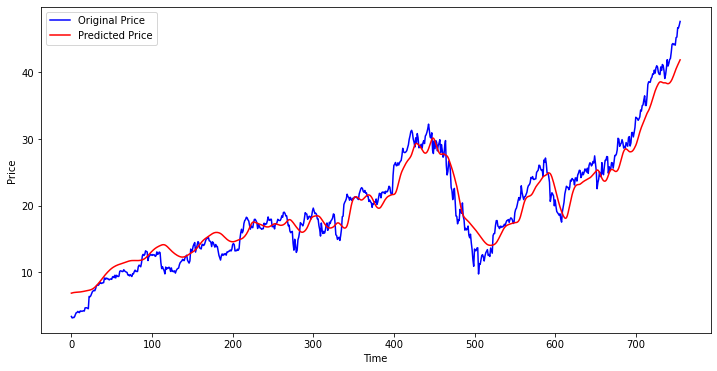

In [68]:
plt.figure(figsize= (12,6))
plt.plot(Y_test, 'b' ,label= 'Original Price')
plt.plot(y_predict, 'r' ,label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()